
#Descargar e importar los archivos de 500 pacientes

In [1]:
import os
import shutil
import numpy as np
import pandas as pd
from keras.preprocessing.image import load_img, img_to_array
from keras import models, layers
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, concatenate
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
image_dir = '/content/drive/MyDrive/CICLO 2024-1/Patrones/Challenge/base_datos/p10'

In [4]:
data_chex=pd.read_csv('/content/drive/MyDrive/CICLO 2024-1/Patrones/Challenge/base_datos/mimic-cxr-2.0.0-chexpert.csv')
data_chex

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,10000032,53189527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,10000032,53911762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,10000032,56699142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,10000764,57375967,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227822,19999442,58708861,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
227823,19999733,57132437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
227824,19999987,55368167,1.0,-1.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0.0,NaN
227825,19999987,58621812,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [5]:
#Utilizare los primeros 500 subject_id

valores_sub_id=data_chex['subject_id'].unique()

segmento=valores_sub_id[:500]
segmento

array([10000032, 10000764, 10000898, 10000935, 10000980, 10001038,
       10001122, 10001176, 10001217, 10001401, 10001851, 10001884,
       10002013, 10002131, 10002157, 10002177, 10002221, 10002428,
       10002430, 10002557, 10002559, 10002661, 10002804, 10002930,
       10003019, 10003052, 10003255, 10003299, 10003400, 10003412,
       10003502, 10003637, 10003956, 10004235, 10004322, 10004457,
       10004720, 10004749, 10005001, 10005024, 10005329, 10005368,
       10005749, 10005858, 10005866, 10006023, 10006431, 10006457,
       10006501, 10006692, 10007058, 10007134, 10007326, 10007795,
       10007920, 10007928, 10008064, 10008179, 10008304, 10008493,
       10008816, 10008922, 10009049, 10009614, 10010150, 10010231,
       10010253, 10010440, 10010471, 10010635, 10010638, 10010867,
       10010920, 10010961, 10011126, 10011169, 10011365, 10011466,
       10011607, 10011668, 10011855, 10011938, 10012261, 10012292,
       10012438, 10012498, 10012569, 10012768, 10012853, 10013

In [6]:
len(segmento)

500

#Extraer los diagnosticos por cada subject_id

In [7]:
frames=[]
indices=segmento
for indice in indices:
  fila = data_chex[data_chex['subject_id'] == indice]
  frames.append(fila)  # Agrega la fila extraída a la lista

# Usando concat para combinar todas las filas en un nuevo DataFrame
data_use = pd.concat(frames)

data_use

,subject_id,study_id,Atelectasis,Cardiomegaly,Consolidation,Edema,Enlarged Cardiomediastinum,Fracture,Lung Lesion,Lung Opacity,No Finding,Pleural Effusion,Pleural Other,Pneumonia,Pneumothorax,Support Devices
0,10000032,50414267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,10000032,53189527,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,10000032,53911762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,10000032,56699142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,10000764,57375967,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1793,10078115,58448677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0
1794,10078115,58810728,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,1.0,NaN,1.0
1795,10078115,59562487,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1796,10078115,59919639,1.0,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,1.0


#Realizo EDA

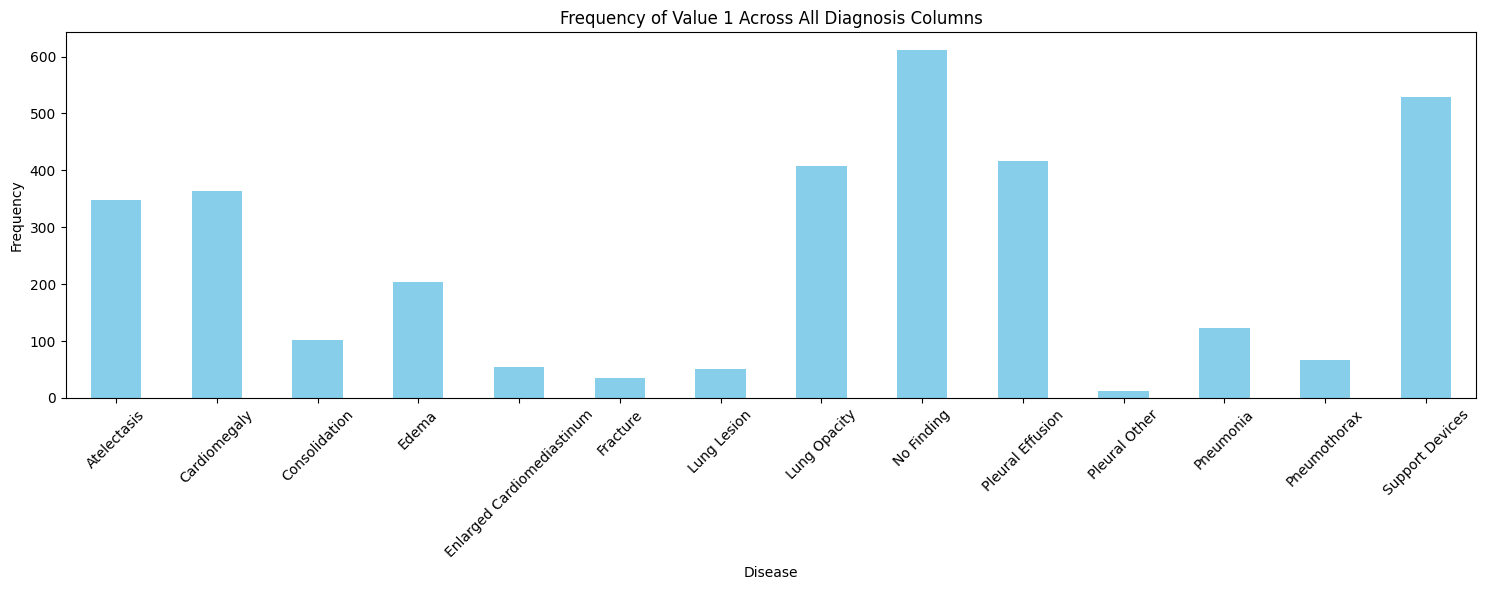

In [31]:

# Filter the DataFrame to include only rows where the value is 1 in each diagnosis column
diagnosis_columns = data_use.drop(['subject_id', 'study_id'], axis=1)
diagnosis_columns_one = diagnosis_columns.eq(1)

# Calculate total frequency of 1 across all columns
total_frequency_counts = diagnosis_columns_one.sum()

# Plot histogram
plt.figure(figsize=(15, 6))
total_frequency_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency of Value 1 Across All Diagnosis Columns')
plt.xlabel('Disease')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#Filtro los diagnosticos a usar

In [32]:
data_use2=data_use.drop(['Consolidation', 'Fracture','Pleural Other','Lung Lesion','Enlarged Cardiomediastinum','Pneumonia','Pneumothorax','No Finding'], axis=1)

In [33]:
#En cada ID tengo que ver que tipo de molecula tiene, por ello, usare la transpuesta del dataframe
#columnas_a_utilizar = ['Atelectasis', 'Cardiomegaly', 'Consolidation','Edema', 'Enlarged Cardiomediastinum', 'Fracture','Lung Lesion','Lung Opacity','No Finding','Pleural Effusion','Pleural Other','Pneumonia','Pneumothorax','Support Devices']
columnas_a_eliminar = ['subject_id','study_id']
# Eliminar las columnas
data = data_use2.drop(columnas_a_eliminar, axis=1)
data1=data.T
data1
#data1[0]

,0,1,2,3,4,5,6,7,8,9,...,1788,1789,1790,1791,1792,1793,1794,1795,1796,1797
Atelectasis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN
Cardiomegaly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,-1.0,1.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0
Edema,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,NaN,NaN,...,1.0,1.0,NaN,NaN,-1.0,NaN,1.0,1.0,1.0,0.0
Lung Opacity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Pleural Effusion,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,-1.0,NaN,NaN,0.0,1.0,NaN,-1.0,NaN,1.0,NaN
Support Devices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN


In [34]:
#utilizo un bucle para analizar cada columna que sera un ID en un bucle
#Dentro del bucle bucle busco que en que posiciones(index) se encuentran los valores diferentes de 0 que implica que tiene esa molecula
#Los tipos de moleculas se colocarán en un lista, en la cual cada fila será el ID  correspondiente
lista=[]
for i in range(0,1797):
  val=data1[i] == 1
  result=data1[i][val]
  tipo=result.index
  info=tipo.tolist()
  valu=''
  if len(info) > 0:
      for val in info:
          valu = valu + " " +val
      info= [valu]
  lista.append(info)

#Aqui convierto la lista en un dataframe para unirlo con el dataframe de df1
df = pd.DataFrame(lista, columns=['Tipo'])
d0 = data_use[['subject_id', 'study_id']].copy()
df_new=pd.concat([d0,df],axis=1)
df_new


,subject_id,study_id,Tipo
0,10000032,50414267,None
1,10000032,53189527,None
2,10000032,53911762,None
3,10000032,56699142,None
4,10000764,57375967,None
...,...,...,...
1793,10078115,58448677,Support Devices
1794,10078115,58810728,Edema Support Devices
1795,10078115,59562487,Cardiomegaly Edema Support Devices
1796,10078115,59919639,Atelectasis Cardiomegaly Edema Lung Opacity P...


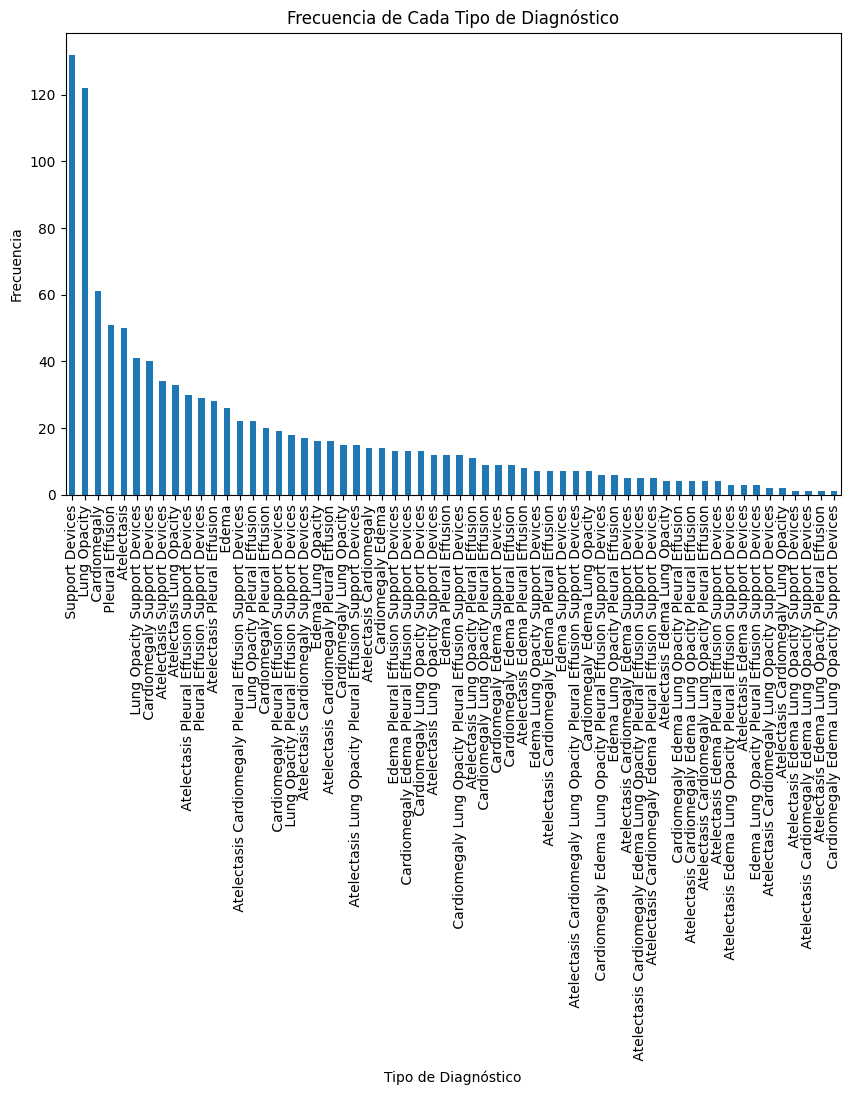

In [35]:

plt.figure(figsize=(10, 6))
df_new['Tipo'].value_counts().plot(kind='bar')
plt.title('Frecuencia de Cada Tipo de Diagnóstico')
plt.xlabel('Tipo de Diagnóstico')
plt.ylabel('Frecuencia')
plt.show()

In [36]:
clases=[' Support Devices',' Lung Opacity',' Cardiomegaly',' Pleural Effusion',' Atelectasis',' Lung Opacity Support Devices',' Atelectasis Support Devices']

# Eliminar filas con valores nulos en la columna 'Tipo'
df_new = df_new.dropna(subset=['Tipo'])

# Filtrar las filas que tienen las clases especificadas
data_use2 = df_new[df_new['Tipo'].isin(clases)]

# Mostrar el DataFrame resultante
data_use2

,subject_id,study_id,Tipo
7,10000935,50578979,Pleural Effusion
8,10000935,51178377,Lung Opacity
10,10000935,56164612,Lung Opacity
18,10000980,57861150,Pleural Effusion
21,10000980,59988438,Pleural Effusion
...,...,...,...
1765,10076958,59180098,Atelectasis Support Devices
1781,10078115,51073410,Atelectasis Support Devices
1783,10078115,51751845,Support Devices
1787,10078115,52481083,Support Devices


In [37]:
# Convertir los diagnósticos a categorías numéricas
diagnostico_mapping ={' Support Devices': 1,' Lung Opacity': 2,' Cardiomegaly': 3,' Pleural Effusion': 4,' Atelectasis': 5,' Lung Opacity Support Devices': 6,' Atelectasis Support Devices': 0}

df_diagnosis=data_use2.copy()

# Aplicar el mapeo a la columna 'Tipo' del DataFrame
df_diagnosis['Tipo'] = df_diagnosis['Tipo'].map(diagnostico_mapping)

# Mostrar el DataFrame resultante
df_diagnosis


,subject_id,study_id,Tipo
7,10000935,50578979,4
8,10000935,51178377,2
10,10000935,56164612,2
18,10000980,57861150,4
21,10000980,59988438,4
...,...,...,...
1765,10076958,59180098,0
1781,10078115,51073410,0
1783,10078115,51751845,1
1787,10078115,52481083,1


#Preprocesar y almacenar las imagenes de los study_id obtenidos

In [15]:
image_dir = '/content/drive/MyDrive/CICLO 2024-1/Patrones/Challenge/base_datos/p10'

In [16]:
import cv2
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    image = cv2.imread(image_path)
    image = cv2.resize(image, target_size)
    image = img_to_array(image) / 255.0  # Normalizar
    return image

In [17]:
# Obtener los study_id necesarios del DataFrame df_diagnosis
study_id_necesarios = df_diagnosis['study_id']

# Diccionario para almacenar las rutas de las imágenes agrupadas por study_id
imagenes_por_study_id = {}

# Recorrer las carpetas de imágenes
for root, dirs, files in os.walk(image_dir):
    for file in files:
        if file.endswith('.jpg'):
            # Obtener el subject_id y el study_id de la ruta de la imagen
            parts = root.split('/')
            subject_id = int(parts[-2][1:])  # Obtener el subject_id desde la penúltima parte de la ruta
            study_id = int(parts[-1][1:])  # Obtener el study_id desde la última parte de la ruta

            # Verificar si el study_id está en los study_id necesarios
            if study_id in study_id_necesarios.values:
                # Almacenar la ruta de la imagen en el diccionario según su study_id
                if study_id not in imagenes_por_study_id:
                    imagenes_por_study_id[study_id] = []
                path = os.path.join(root, file)
                imagenes_por_study_id[study_id].append(load_and_preprocess_image(path))

# Ahora imagenes_por_study_id contendrá solo las rutas de las imágenes correspondientes a los study_id necesarios.


In [18]:
#imagenes_por_study_id

In [19]:
len(imagenes_por_study_id)

491

In [20]:
# Crear un diccionario para almacenar las imagenes agrupadas por study_id en el orden del df_diagnosis original
imagenes_por_study_id_ordenado = {}

# Iterar sobre las filas del DataFrame original
for index, row in df_diagnosis.iterrows():
    study_id = row['study_id']
    if study_id in imagenes_por_study_id:
        # Almacenar las rutas de las imágenes en el nuevo diccionario
        imagenes_por_study_id_ordenado[study_id] = imagenes_por_study_id.get(study_id)
imagenes_por_study_id_ordenado

{50578979: [array([[[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         ...,
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]],
  
         [[0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.],
          ...,
          [0., 0., 0.],
          [0., 0., 0.],
          [0., 0., 0.]]

In [55]:
np.shape(imagenes_por_study_id_ordenado[51178377])

(2, 224, 224, 3)

#Imprimir imagenes

In [ ]:
len(imagenes_por_study_id_ordenado)

491

In [ ]:
#imagenes_por_study_id_ordenado

In [ ]:
#Usar si es que se guardo las rutas
#Imprimir las rutas de las imágenes agrupadas por study_id en el nuevo diccionario
#for study_id, rutas_imagenes in imagenes_por_study_id_ordenado.items():
#    print(f'Study ID: {study_id}')
#    for ruta_imagen in rutas_imagenes:
#        print(f'   {ruta_imagen}')

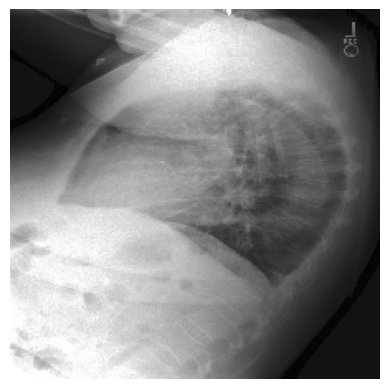

In [65]:
val=imagenes_por_study_id_ordenado[57861150][0]
#val
plt.imshow(val)
plt.axis('off')
plt.show()

In [ ]:
val.shape

(224, 224, 3)

In [ ]:
#imagenes_por_study_id_ordenado

#Asignar a las imagenes por study_id su diagnostico

In [ ]:
#selecciona las imagenes con los codigos study_id que se usaran


In [61]:
# Prepararo los datos
imagenes = []
etiquetas = []

for study_id, imagenes_array in imagenes_por_study_id_ordenado.items():
    if study_id in df_diagnosis['study_id'].values:
        diagnostico = df_diagnosis[df_diagnosis['study_id'] == study_id]['Tipo'].values[0]
        for imagen in imagenes_array:
            imagenes.append(imagen)
            etiquetas.append(diagnostico)

imagenes = np.array(imagenes)
etiquetas = to_categorical(np.array(etiquetas))

In [57]:
np.shape(imagenes)

(747, 224, 224, 3)

In [62]:
etiquetas

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

#Modelo de CNN 1


In [59]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import regularizers
from sklearn.model_selection import train_test_split

# Supongo que las imágenes y etiquetas ya están cargadas en las variables imagenes y etiquetas

# Divide los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)

# Define el modelo con regularización
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=regularizers.l2(0.01)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(len(diagnostico_mapping), activation='softmax', kernel_regularizer=regularizers.l2(0.01))
])

# Compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()




Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 186624)            0         
                                                                 
 dense_5 (Dense)             (None, 128)              

In [ ]:
# Evalúa el modelo
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

In [ ]:
# Entrena el modelo
modelb0=model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

#Modelo de CNN 1: Se agrego regularizadores y más capas

In [63]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras import regularizers
from sklearn.model_selection import train_test_split

# Supongo que las imágenes y etiquetas ya están cargadas en las variables imagenes y etiquetas

# Divide los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)

# Define el modelo mejorado con más capas y regularización
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3), kernel_regularizer=regularizers.l2(0.01)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),
    Dense(len(diagnostico_mapping), activation='softmax', kernel_regularizer=regularizers.l2(0.01))
])

# Compila el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Resumen del modelo
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 26, 26, 128)      

In [64]:
# Entrena el modelo
modelb1=model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
19/19 [==============================] - 116s 6s/step - loss: 9.8899 - accuracy: 0.2781 - val_loss: 6.0530 - val_accuracy: 0.2267
Epoch 2/10
19/19 [==============================] - 96s 5s/step - loss: 4.7423 - accuracy: 0.2965 - val_loss: 3.7957 - val_accuracy: 0.2267
Epoch 3/10
19/19 [==============================] - 97s 5s/step - loss: 3.3173 - accuracy: 0.2881 - val_loss: 2.9959 - val_accuracy: 0.2267
Epoch 4/10
19/19 [==============================] - 105s 6s/step - loss: 2.7590 - accuracy: 0.2998 - val_loss: 2.6022 - val_accuracy: 0.2267
Epoch 5/10
19/19 [==============================] - 91s 5s/step - loss: 2.4631 - accuracy: 0.2965 - val_loss: 2.3991 - val_accuracy: 0.2267
Epoch 6/10
19/19 [==============================] - 100s 5s/step - loss: 2.3030 - accuracy: 0.3082 - val_loss: 2.2663 - val_accuracy: 0.2267
Epoch 7/10
19/19 [==============================] - 99s 5s/step - loss: 2.1734 - accuracy: 0.3049 - val_loss: 2.1732 - val_accuracy: 0.2267
Epoch 8/10
19/19 

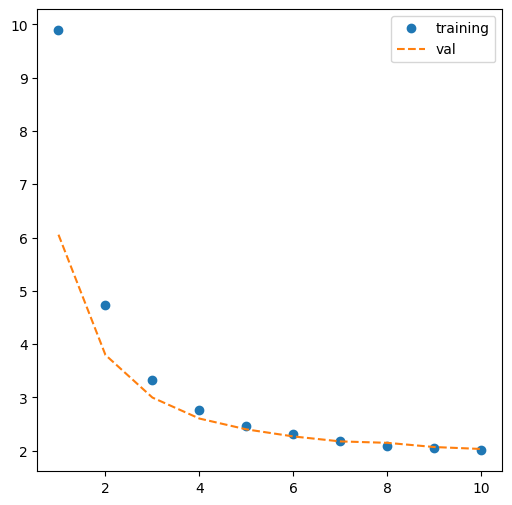

In [67]:

modelb_dict = modelb1.history
loss_values = modelb_dict['loss']
val_loss_values = modelb_dict['val_loss']

fig = plt.figure(figsize=(6,6))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()